In [1]:
import numpy as np
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import pandas as pd
import sklearn.linear_model as lm

# Rename and Resize the images

In [3]:
path='.\data\cat'

In [16]:
count=0
for i in os.listdir(path):
    src=os.path.join(path,i)
    dst=os.path.join(path,'c'+count.__str__()+'.jpg')
    os.rename(src,dst)
    count+=1

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: '.\\data\\cat\\c10.jpg' -> '.\\data\\cat\\c2.jpg'

In [4]:
width_list=[]
height_list=[]
name_list=[]
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i)
info_df_cat=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [5]:
info_df_cat

,name,width,height
0,c0.jpg,375,500
1,c1.jpg,500,375
2,c10.jpg,426,500
3,c100.jpg,375,500
4,c1000.jpg,1024,681
...,...,...,...
9992,c9992.jpg,387,500
9993,c9993.jpg,500,375
9994,c9994.jpg,357,500
9995,c9995.jpg,500,333


In [6]:
info_df_cat.describe()

,width,height
count,9997.000000,9997.000000
mean,604.832950,520.309993
std,237.214102,208.772235
min,135.000000,101.000000
25%,500.000000,375.000000
50%,500.000000,447.000000
75%,768.000000,683.000000
max,1024.000000,1024.000000


<Axes: xlabel='height'>

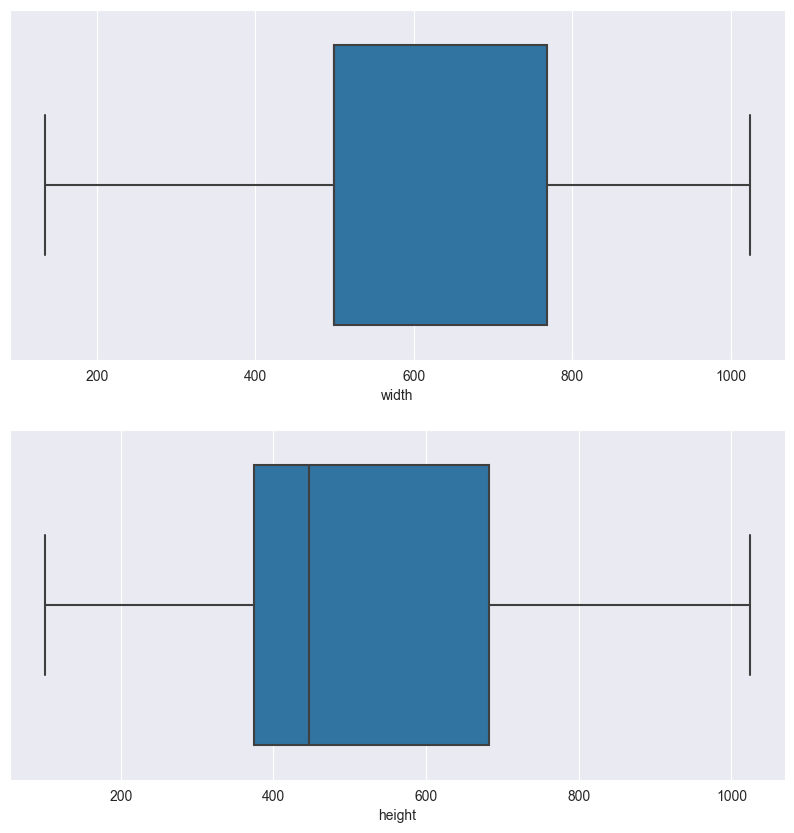

In [8]:
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df_cat,ax=ax[0])
sns.boxplot(x="height",data=info_df_cat,ax=ax[1])

<Axes: xlabel='width', ylabel='height'>

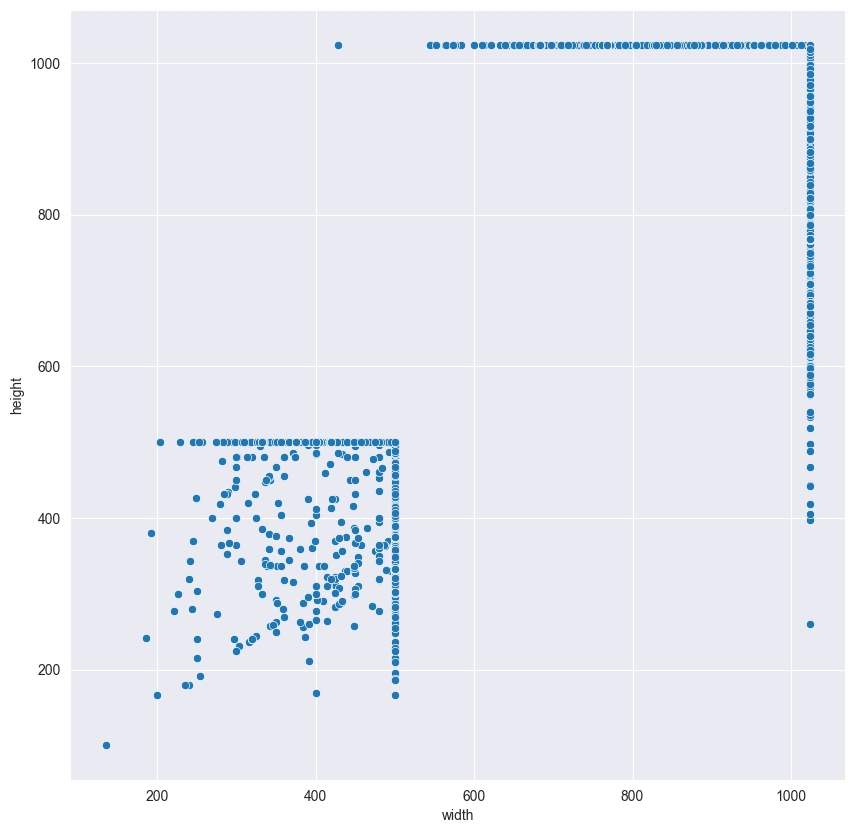

In [9]:
f=plt.figure(figsize=(10,10))
sns.scatterplot(x="width",y="height",data=info_df_cat)

In [10]:
lr=lm.LinearRegression()
lr.fit(np.array(info_df_cat["width"]).reshape(-1,1),np.array(info_df_cat["height"]).reshape(-1,1))

LinearRegression()

In [11]:
sns.scatterplot(x="width",y="height",data=info_df)
plt.plot(np.array(info_df["width"]),lr.predict(np.array(info_df["width"]).reshape(-1,1)),color="red")

NameError: name 'info_df' is not defined

In [24]:
print(lr.coef_,lr.intercept_)

[[0.63973425]] [133.3776412]


According to linear regression, we can find that the height and width does not have strong linear relationship. So we can not resize the images to a fixed size. We can only resize the images to a fixed size and then crop the images to a fixed size.

In [12]:
info_df_cat.describe()

,width,height
count,9997.000000,9997.000000
mean,604.832950,520.309993
std,237.214102,208.772235
min,135.000000,101.000000
25%,500.000000,375.000000
50%,500.000000,447.000000
75%,768.000000,683.000000
max,1024.000000,1024.000000


It is not hard to find that there is a obvious gathering  in the length of 1024 and 512, and they are all the mutiple of 128. So we can resize the images to 128*128.

Do the same thing to the dog images.

In [13]:
path='.\data\dog'
count=0
for i in os.listdir(path):
    src=os.path.join(path,i)
    dst=os.path.join(path,'d'+count.__str__()+'.jpg')
    os.rename(src,dst)
    count+=1

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: '.\\data\\dog\\d10.jpg' -> '.\\data\\dog\\d2.jpg'

In [14]:
width_list=[]
height_list=[]
name_list=[]
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    width,height=img.size
    width_list.append(width)
    height_list.append(height)
    name_list.append(i)
info_df_dog=pd.DataFrame({"name":name_list,"width":width_list,"height":height_list})

In [15]:
info_df_dog

,name,width,height
0,d0.jpg,500,375
1,d1.jpg,500,375
2,d10.jpg,196,211
3,d100.jpg,328,480
4,d1000.jpg,333,500
...,...,...,...
10284,d9995.jpg,500,375
10285,d9996.jpg,500,375
10286,d9997.jpg,500,375
10287,d9998.jpg,500,375


In [16]:
info_df_dog.describe()

,width,height
count,10289.000000,10289.000000
mean,440.963553,383.957139
std,135.430871,121.264255
min,97.000000,100.000000
25%,361.000000,333.000000
50%,500.000000,375.000000
75%,500.000000,450.000000
max,2592.000000,2560.000000


<Axes: xlabel='height'>

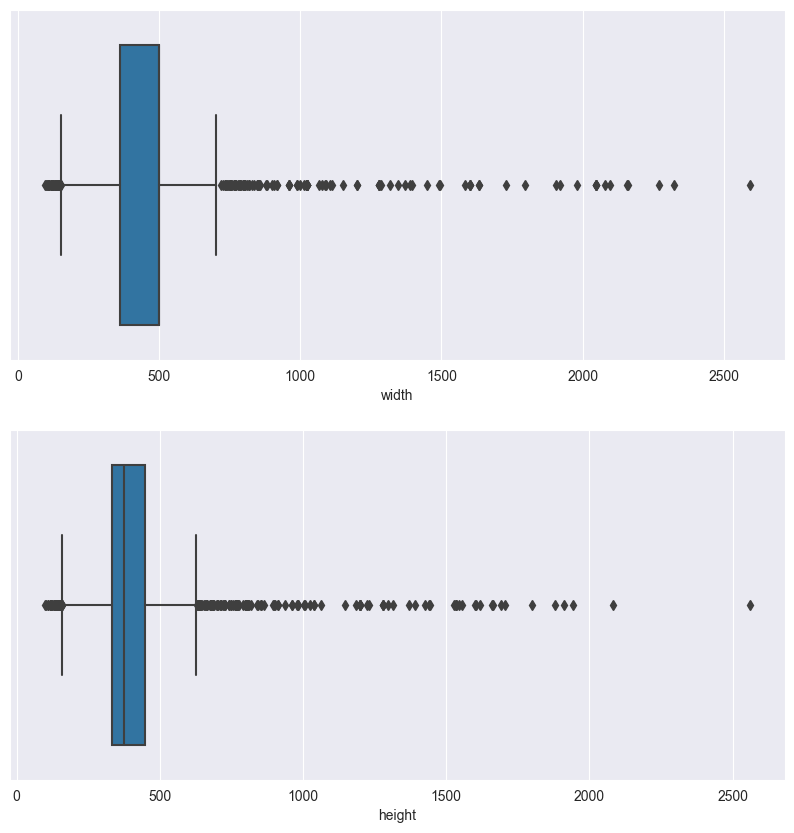

In [17]:
f,ax=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x="width",data=info_df_dog,ax=ax[0])
sns.boxplot(x="height",data=info_df_dog,ax=ax[1])

<Axes: xlabel='width', ylabel='height'>

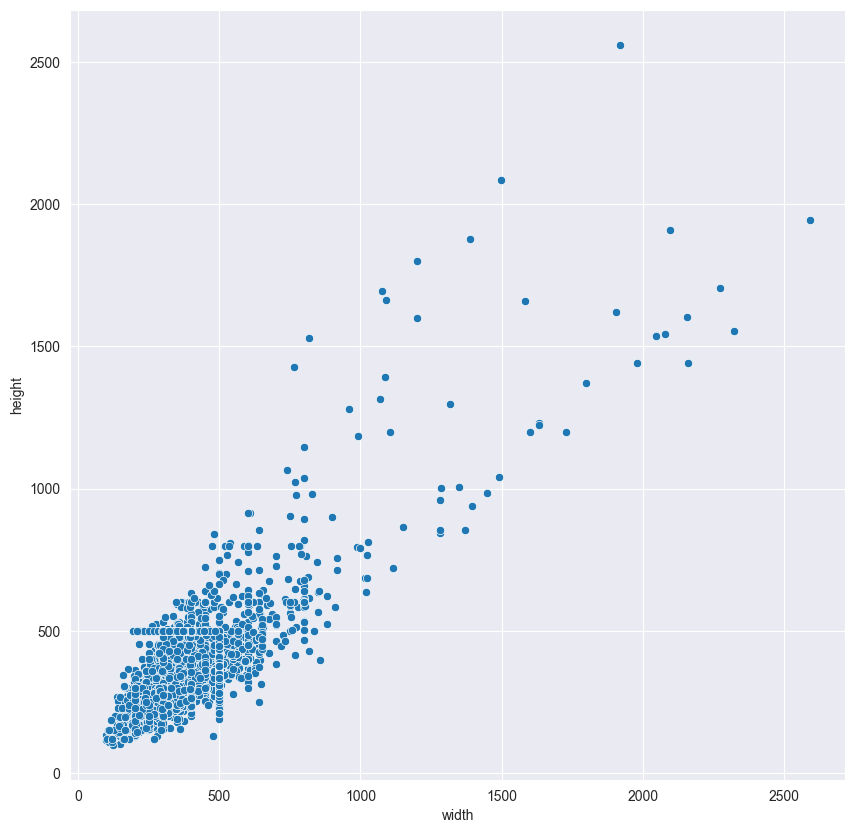

In [18]:
f=plt.figure(figsize=(10,10))
sns.scatterplot(x="width",y="height",data=info_df_dog)


In [19]:
lr=lm.LinearRegression()
lr.fit(np.array(info_df_dog["width"]).reshape(-1,1),np.array(info_df_dog["height"]).reshape(-1,1))

LinearRegression()

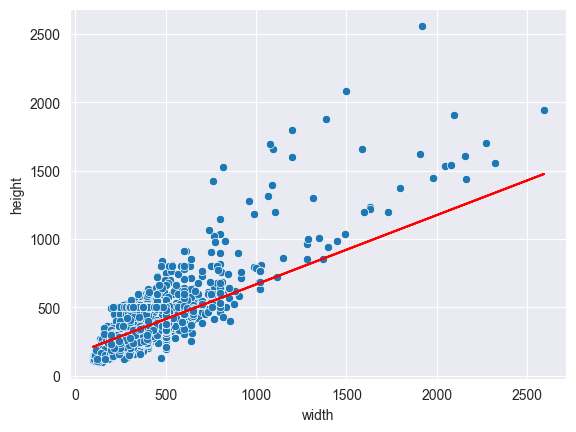

In [20]:
sns.scatterplot(x="width",y="height",data=info_df_dog)
plt.plot(np.array(info_df_dog["width"]),lr.predict(np.array(info_df_dog["width"]).reshape(-1,1)),color="red")

In [21]:
print(lr.coef_,lr.intercept_)

[[0.50736963]] [160.22562375]


The same thing can be found in the dog images.

So, we can resize the images to 128*128.

In [22]:
path='.\data\cat'
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    img=img.resize((128,128))
    img.save(path+"\\"+i)

In [ ]:
path='.\data\dog'
for i in os.listdir(path):
    img=Image.open(path+"\\"+i)
    img=img.resize((128,128))
    img.save(path+"\\"+i)

To confirm the resize operation has no influence on classification, we can randomly select 20 images from the cat and dog images and show them.

In [2]:
path='.\data\cat'
img_list=[]
for i in range(20):
    img=Image.open(path+"\\"+os.listdir(path)[np.random.randint(0,9997)])
    img_list.append(img)

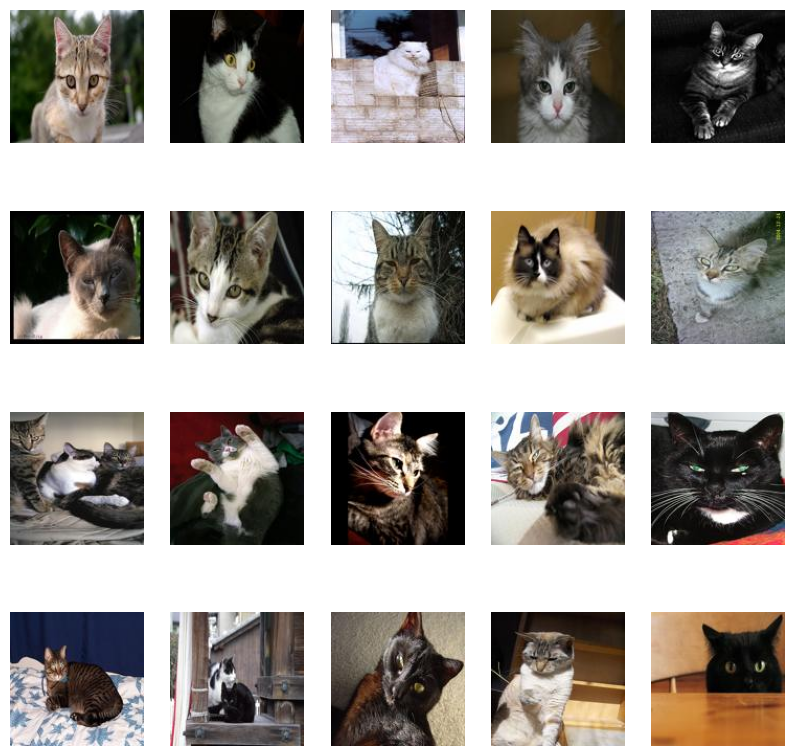

In [3]:
f,ax=plt.subplots(4,5,figsize=(10,10))
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(img_list[i*5+j])
        ax[i,j].axis("off")

In [5]:
path='.\data\dog'
img_list=[]
for i in range(20):
    img=Image.open(path+"\\"+os.listdir(path)[np.random.randint(0,9997)])
    img_list.append(img)

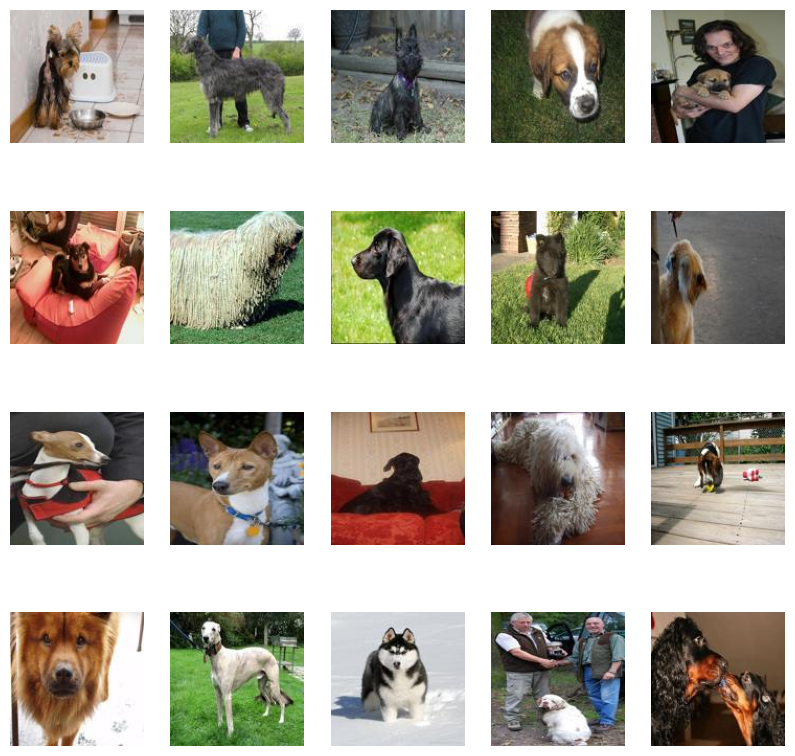

In [6]:
f,ax=plt.subplots(4,5,figsize=(10,10))
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(img_list[i*5+j])
        ax[i,j].axis("off")

Althogh some image are a little anamorphose, we can still recognize whether it is a cat or a dog.